In [1]:
%load_ext autoreload
%autoreload 2
import os
import qutip
import numpy as np
import matplotlib.pyplot as plt
from qurveros import plottools, misctools
from qurveros.qubit_bench import noise_experiments

import matplotlib
import qurveros.plot_configs
matplotlib.rcParams['figure.dpi'] = 150

In [2]:
gate_select = 'xgate'
step_select = 50000

if gate_select == 'hadamard':
    u_target = 1/np.sqrt(2)*qutip.Qobj([[1,1],[1,-1]])
elif gate_select == 'xgate':
    u_target = qutip.sigmax()
else:
    u_target = None

control_points_paths = [os.path.join(os.getcwd(),'control_points', name) 
                    for name in os.listdir('control_points') 
                    if gate_select in name and str(step_select) in name]

filepath = control_points_paths[0]
curve = misctools.prepare_bezier_from_file(filepath, is_barq=True)
curve.evaluate_control_dict('TTC')

In [3]:
print(os.path.basename(control_points_paths[0]))

xgate_step50000.csv


In [4]:
sim_dict = noise_experiments.simult_source_experiment(curve.get_control_dict(),
                                                      u_target)

Static additive dephasing and multiplicative driving field experiment



Multiplicative driving field error:	 0.00 %
Multiplicative driving field error:	 8.33 %                                   
Multiplicative driving field error:	16.67 %                                   
Multiplicative driving field error:	25.00 %                                   
Multiplicative driving field error:	33.33 %                                   
Multiplicative driving field error:	41.67 %                                   
Multiplicative driving field error:	50.00 %                                   
Multiplicative driving field error:	58.33 %                                   
Multiplicative driving field error:	66.67 %                                   
Multiplicative driving field error:	75.00 %                                   
Multiplicative driving field error:	83.33 %                                   
Multiplicative driving field error:	91.67 %                                   
Multiplicative driving field error:	100.00%                                   


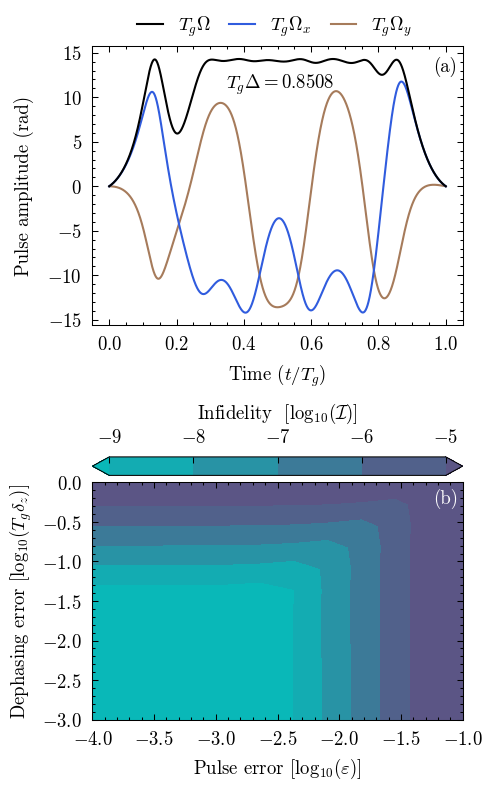

In [5]:
width = plt.rcParams['figure.figsize'][0]
height = plt.rcParams['figure.figsize'][1]

fig, axs = plt.subplots(2, 1, gridspec_kw=dict(height_ratios=[1, 0.85]), 
                              figsize = (width, 2.15*height),
                              layout='constrained')

label_str = 'abc'

idx = 0
plottools.plot_fields(curve.get_control_dict(), 
                      plot_mode='compact',
                      axs=axs[idx])

axs[idx].text(0.92, 0.91, f'({label_str[idx]})', 
              transform=axs[idx].transAxes,
              fontsize = matplotlib.rcParams['axes.labelsize'] )

tg_delta = curve.get_control_dict()['delta'][0]
tg_delta = np.round(tg_delta, 4)

axs[idx].text(0.36, 0.85, rf'$T_g\Delta={tg_delta}$', 
              transform=axs[idx].transAxes,
              fontsize = matplotlib.rcParams['axes.labelsize'])

axs[idx].locator_params(axis='y',nbins=10)
axs[idx].legend(loc=[0.1,1], ncol=3)

#################################################################
idx = 1

contour_set = plottools.plot_noise_contour(sim_dict,ax=axs[idx])
axs[idx].text(0.92, 0.91, f'({label_str[idx]})', 
            transform=axs[idx].transAxes,
            fontsize = matplotlib.rcParams['axes.labelsize'],
            color='w')

cb = fig.colorbar(contour_set, location='top',ax=axs[1],pad=0)
cb.set_label(r'Infidelity  $[\text{log}_{10}(\mathcal{I})]$',
                     labelpad=matplotlib.rcParams['xtick.major.pad'])

fig.align_ylabels()

plt.savefig('figs/'+gate_select+'_fields_noise.pdf')
plt.savefig('figs/'+gate_select+'_fields_noise.svg')